Before using this notebook, please go to the `README.md` file to set up and generate some files first.

In [1]:
import arcontrol2nwb
# from ndx_beadl.plot import *
from utils.plot_behaviors import *

from matplotlib import pyplot as plt
%matplotlib inline

# Convert example data to NWB

In [2]:
arc_data_file = 'data/acquisition/2022-0625-121053.txt'
arc_aconf_file = 'data/task/GNG_2021.aconf'
arc_json_file = 'data/task/GNG_2021.json'

nwb_filename = arcontrol2nwb.convert(
    arc_data_filename=arc_data_file,
    arc_taskprogram_aconf=arc_aconf_file,   # optional
    arc_taskprogram_json=arc_json_file,     # optional
    # arc_taskprogram_filename=arcfile      # TODO: The example is missing the ARControl XML task program
    use_behavioral_time_series=False,      
    use_ndx_beadl=True, 
    append_to_nwb_file=False, 
    ndx_beadl_cfg=dict( 
        # These are default values to control whether to add to NWBFile object 
        add_events_to_acquisition=True,
        add_actions_to_acquisition=True,
        add_states_to_acquisition=True,
        add_to_trials=True,
        add_trials_to_acquisition=False
    )
)

# Print data parsed from the ARControl data file

This part does not involves NWB, but good to know what's inside ArControl task design and output data

In [3]:
import pprint
arcdata = arcontrol2nwb.arc2dict(
    arc_data_filename=arc_data_file,
    arc_taskprogram_aconf=arc_aconf_file,
    arc_taskprogram_json=arc_json_file
)
# pprint.pprint(arcdata)
print(arcdata.keys())
print(arcdata['info'].keys())

dict_keys(['info', 'OUT6', 'C1S1', 'C1S2', 'C1S3', 'OUT7', 'C1S4', 'IN1', 'C1S5', 'C4S1', 'OUT8', 'C4S2', 'OUT1', 'C4S3', 'OUT2', 'C4S4', 'C4S5', 'C4S6', 'C4S7', 'C4S9', 'C4S10', 'C7S1', 'C7S2', 'C5S1', 'C5S2', 'C5S3', 'OUT3', 'C5S4', 'C5S5', 'C5S6', 'C5S7', 'C5S8', 'C5S10', 'C6S1', 'C6S2', 'C2S1', 'C2S2', 'C2S3', 'OUT4', 'C2S4', 'C2S5', 'C2S6', 'C2S7', 'C2S10', 'C2S8', 'C2S9', 'C5S9', 'C3S1', 'C3S2', 'C3S3', 'OUT5', 'C3S4', 'C3S5', 'C3S6', 'C3S7', 'C3S10', 'C3S8', 'C3S9', 'C4S8', 'C1', 'C4', 'C7', 'C5', 'C6', 'C2', 'C3'])
dict_keys(['OUT1', 'OUT2', 'OUT3', 'OUT4', 'OUT5', 'OUT6', 'OUT7', 'OUT8', 'IN1', 'C1', 'C1S1', 'C1S2', 'C1S3', 'C1S4', 'C1S5', 'C2', 'C2S1', 'C2S2', 'C2S3', 'C2S4', 'C2S5', 'C2S6', 'C2S7', 'C2S8', 'C2S9', 'C2S10', 'C3', 'C3S1', 'C3S2', 'C3S3', 'C3S4', 'C3S5', 'C3S6', 'C3S7', 'C3S8', 'C3S9', 'C3S10', 'C4', 'C4S1', 'C4S2', 'C4S3', 'C4S4', 'C4S5', 'C4S6', 'C4S7', 'C4S8', 'C4S9', 'C4S10', 'C5', 'C5S1', 'C5S2', 'C5S3', 'C5S4', 'C5S5', 'C5S6', 'C5S7', 'C5S8', 'C5S9', 'C5S

In [4]:
pd.DataFrame({k: v for k, v in arcdata['info'].items() if isinstance(v, dict)}).T

,label,type,actions,states,transitions
OUT1,#MOIL,NaN,NaN,NaN,NaN
OUT2,#NoGoCue,NaN,NaN,NaN,NaN
OUT3,#NoGoCue2,NaN,NaN,NaN,NaN
OUT4,#GoCue,NaN,NaN,NaN,NaN
OUT5,#GoCue2,NaN,NaN,NaN,NaN
...,...,...,...,...,...
C0S0,End session,NaN,NaN,NaN,NaN
C0,End session,NaN,NaN,NaN,NaN
task_program_dict,NaN,NaN,NaN,"[{'name': 'initial', 'type': 'initial'}, {'nam...","[{'from': 'initial', 'to': 'C1'}, {'from': 'C1..."
initial,None,initial,[],NaN,NaN


# Read data from NWB

In [5]:
from pynwb import NWBHDF5IO

io = NWBHDF5IO('data/acquisition/2022-0625-121053.nwb', mode='r')
nwb = io.read()

In [6]:
nwb

root pynwb.file.NWBFile at 0x140564914276816
Fields:
  acquisition: {
    actions <class 'ndx_beadl.trials_table.ActionsTable'>,
    events <class 'ndx_beadl.trials_table.EventsTable'>,
    states <class 'ndx_beadl.trials_table.StatesTable'>
  }
  experimenter: ['ArControl behavior recorder']
  file_create_date: [datetime.datetime(2023, 3, 8, 17, 11, 52, 66516, tzinfo=tzoffset(None, -18000))]
  identifier: GNG_2021.2022-06-25 12:10:53-04:00
  intervals: {
    trials <class 'ndx_beadl.trials_table.TrialsTable'>
  }
  lab_meta_data: {
    task <class 'ndx_beadl.trials_table.Task'>
  }
  session_description: GNG_2021
  session_start_time: 2022-06-25 12:10:53-04:00
  timestamps_reference_time: 2022-06-25 12:10:53-04:00
  trials: trials <class 'ndx_beadl.trials_table.TrialsTable'>

In [7]:
nwb.trials.to_dataframe(index=True)

,start_time,stop_time,states,events,actions
id,,,,,
0,0.000,40.096,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
1,40.096,62.197,"[22, 23, 24, 25, 26, 27, 28]","[131, 132, 133, 134, 135, 136, 137, 138, 139, ...","[11, 12, 13, 14]"
2,62.197,72.197,"[29, 30, 31, 32]","[149, 150, 151, 152, 153, 154, 155]",[]
3,72.197,97.296,"[33, 34, 35, 36, 37, 38, 39, 40, 41]","[156, 157, 158, 159, 160, 161, 162]","[15, 16, 17, 18]"
4,97.296,107.296,"[42, 43]",[],[]
...,...,...,...,...,...
148,2432.217,2442.217,"[868, 869]",[],[]
149,2442.217,2464.496,"[870, 871, 872, 873, 874, 875, 876, 877, 878, ...","[1609, 1610, 1611, 1612, 1613, 1614, 1615, 161...","[344, 345, 346, 347, 348]"
150,2464.496,2474.496,"[880, 881]",[],[]


## Explore the `task` metadata

In [8]:
from hdmf.common.hierarchicaltable import to_hierarchical_dataframe

In [9]:
nwb.get_lab_meta_data('task').state_types.to_dataframe()

,state_name,state_label,state_type,state_action,state_action_type
id,,,,,
0,C1,init licks,regular,[],[]
1,C1S1,LED,regular,[OUT6 keepon],[activity]
2,C1S2,Moil on,regular,[OUT1 turnon],[activity]
3,C1S3,Wait lick,regular,[],[]
4,C1S4,Water,regular,[OUT7 0.03s],[activity]
5,C1S5,start exp,regular,[],[]
6,C2,Go trial 1,regular,[],[]
7,C2S1,LED on,regular,[LED on],[activity]
8,C2S2,time interval 5s,regular,[2P trigger],[activity]


In [10]:
nwb.get_lab_meta_data('task').event_types.to_dataframe()

,event_name,event_label
id,,
0,IN1,#1 lick


In [11]:
nwb.get_lab_meta_data('task').action_types.to_dataframe()

,action_name,action_label
id,,
0,OUT1,#MOIL
1,OUT2,#NoGoCue
2,OUT3,#NoGoCue2
3,OUT4,#GoCue
4,OUT5,#GoCue2
5,OUT6,#LED
6,OUT7,#Water
7,OUT8,#2P trigger


## Explore `acquisition`

In [12]:
to_hierarchical_dataframe(nwb.acquisition['actions']).reset_index()

source_table actions                            action_types              \
label             id timestamp value   duration           id action_name   
0                  0     0.000         0.100000            5        OUT6   
1                  1     0.100        45.096001            0        OUT1   
2                  2     8.483         0.030000            6        OUT7   
3                  3    10.483         0.100000            5        OUT6   
4                  4    15.749         0.030000            6        OUT7   
..               ...       ...   ...        ...          ...         ...   
348              348  2452.466         0.030000            6        OUT7   
349              349  2474.496         0.100000            5        OUT6   
350              350  2474.596         0.500000            7        OUT8   
351              351  2479.596         2.000000            3        OUT4   
352              352  2484.659         0.030000            6        OUT7   

source_table               
label        action_label  
0                    #LED  
1                   #MOIL  
2                  #Water  
3                    #LED  
4                  #Water  
..                    ...  
348                #Water  
349                  #LED  
350           #2P trigger  
351                #GoCue  
352                #Water  

[353 rows x 7 columns]

In [13]:
to_hierarchical_dataframe(nwb.acquisition['events']).reset_index()

source_table events                          event_types             \
label            id timestamp value duration          id event_name   
0                 0     8.483          0.049           0        IN1   
1                 1     9.059          0.053           0        IN1   
2                 2     9.127          0.000           0        IN1   
3                 3     9.375          0.038           0        IN1   
4                 4     9.668          0.043           0        IN1   
...             ...       ...   ...      ...         ...        ...   
1653           1653  2485.803          0.007           0        IN1   
1654           1654  2485.832          0.036           0        IN1   
1655           1655  2485.951          0.064           0        IN1   
1656           1656  2486.100          0.061           0        IN1   
1657           1657  2486.256          0.060           0        IN1   

source_table              
label        event_label  
0                #1 lick  
1                #1 lick  
2                #1 lick  
3                #1 lick  
4                #1 lick  
...                  ...  
1653             #1 lick  
1654             #1 lick  
1655             #1 lick  
1656             #1 lick  
1657             #1 lick  

[1658 rows x 7 columns]

In [14]:
to_hierarchical_dataframe(nwb.acquisition['states']).reset_index()

source_table states                      state_types             \
label            id start_time stop_time          id state_name   
0                 0      0.000     0.100           1       C1S1   
1                 1      0.100     5.100           2       C1S2   
2                 2      5.100     8.483           3       C1S3   
3                 3      8.483    10.483           4       C1S4   
4                 4     10.483    10.583           1       C1S1   
..              ...        ...       ...         ...        ...   
887             887   2484.597  2484.659          13       C2S7   
888             888   2484.659  2484.689          14       C2S8   
889             889   2484.689  2496.689          15       C2S9   
890             890   2496.689  2496.689          51       C6S1   
891             891   2496.689  2496.689          16      C2S10   

source_table                                                   \
label             state_label state_type         state_action   
0                         LED    regular        [OUT6 keepon]   
1                     Moil on    regular        [OUT1 turnon]   
2                   Wait lick    regular                   []   
3                       Water    regular         [OUT7 0.03s]   
4                         LED    regular        [OUT6 keepon]   
..                        ...        ...                  ...   
887             wait for lick    regular                   []   
888                    reward    regular  [Water 0.1 seconds]   
889              end of trial    regular                   []   
890                              regular                   []   
891           rand next trial    regular                   []   

source_table                    
label        state_action_type  
0                   [activity]  
1                   [activity]  
2                           []  
3                   [activity]  
4                   [activity]  
..                         ...  
887                         []  
888                 [activity]  
889                         []  
890                         []  
891                         []  

[892 rows x 9 columns]

# Basic visualizatons of the data in NWB

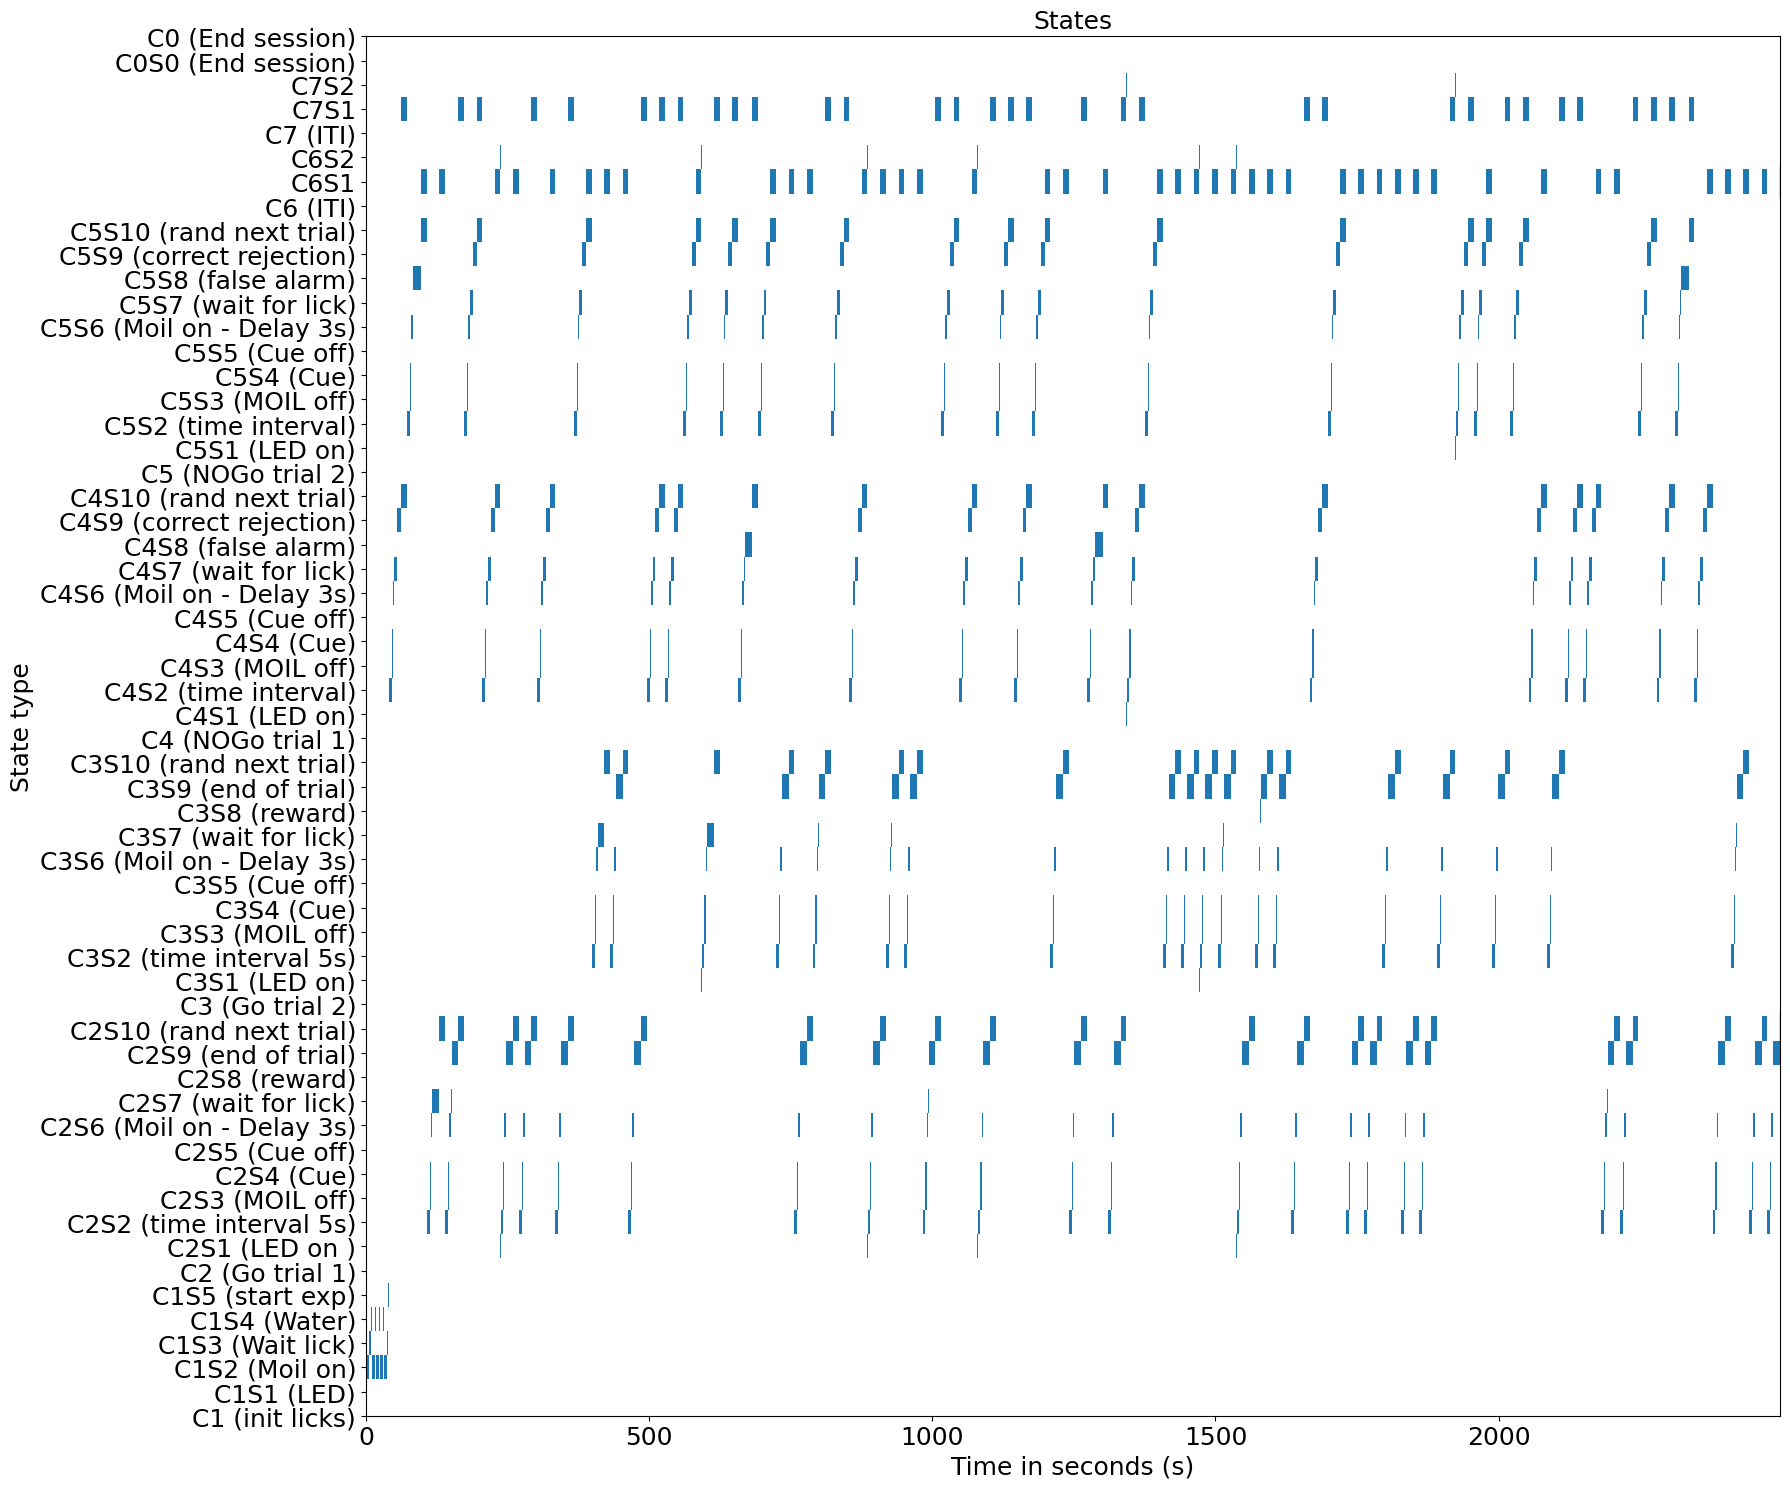

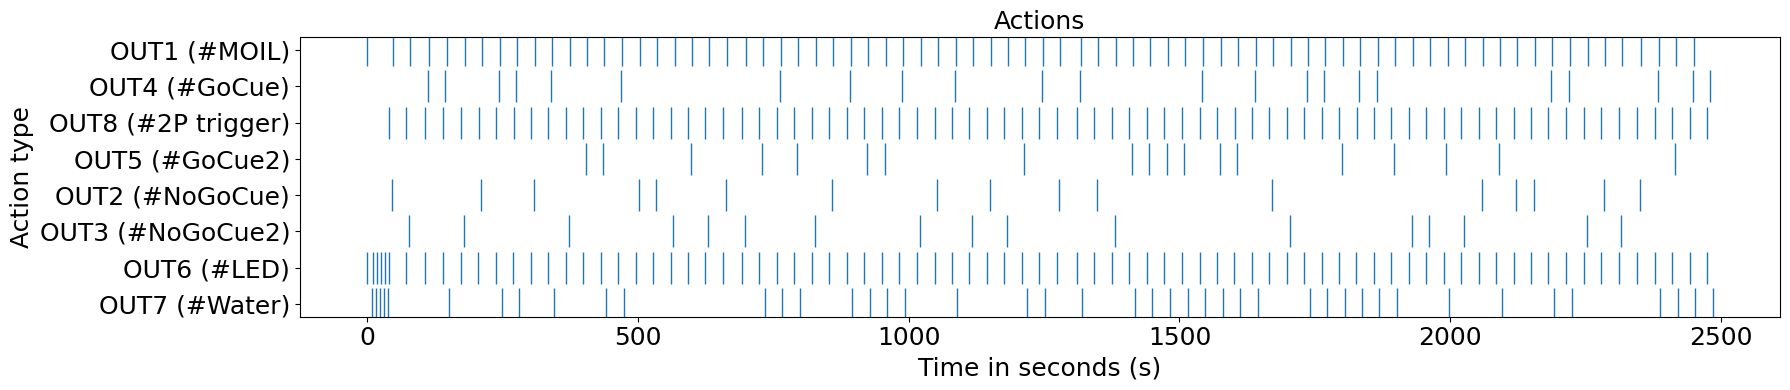

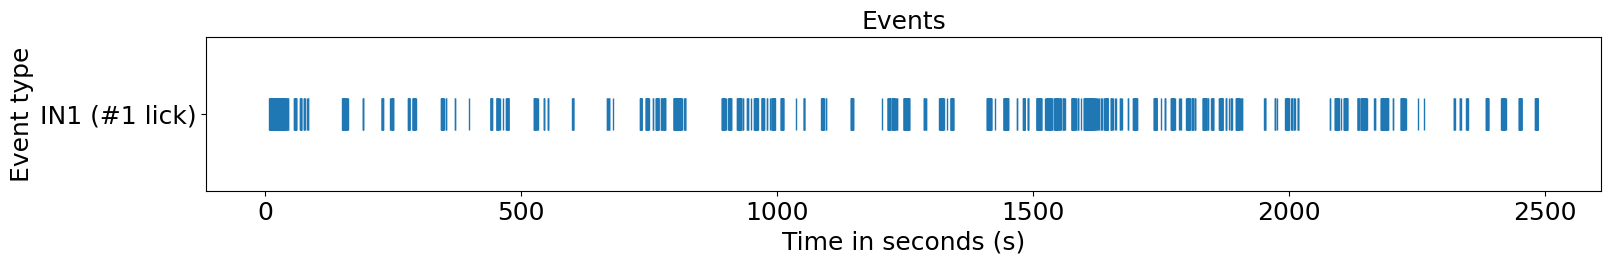

In [15]:
# Plot the events data
fig = plot_states(
    states=nwb.get_acquisition("states"),
    state_types=nwb.get_lab_meta_data('task').state_types,
    description_field='state_label',
    figsize=(18,15),
    marker_size=500
)
plt.title("States", fontsize=18)
plt.tight_layout()
plt.show()

# Plot the actions data
fig = plot_actions(
    actions=nwb.get_acquisition("actions"),
    action_types=nwb.get_lab_meta_data('task').action_types,
    show_action_values=True,
    value_field='action_label',
    figsize=(18,4),
    marker_size=500
)
plt.title("Actions", fontsize=18)
plt.tight_layout()

plt.show()

# Plot the events data
fig = plot_events(
    events=nwb.get_acquisition("events"),
    event_types=nwb.get_lab_meta_data('task').event_types,
    show_event_values=True,
    value_field='event_label',
    figsize=(18,2),
    marker_size=500
)
plt.title("Events", fontsize=18)
plt.show()


# Explore the file with NWBWidgets

In [ ]:
from nwbwidgets import nwb2widget
nwb2widget(nwb)

# Load and plot the States table form the NWB file

For the StatesTable we can merge the definition of the references states by using ``to_hierarchical_dataframe`` instead. 

In [17]:
to_hierarchical_dataframe(nwb.acquisition['states']).reset_index()

source_table states                      state_types             \
label            id start_time stop_time          id state_name   
0                 0      0.000     0.100           1       C1S1   
1                 1      0.100     5.100           2       C1S2   
2                 2      5.100     8.483           3       C1S3   
3                 3      8.483    10.483           4       C1S4   
4                 4     10.483    10.583           1       C1S1   
..              ...        ...       ...         ...        ...   
887             887   2484.597  2484.659          13       C2S7   
888             888   2484.659  2484.689          14       C2S8   
889             889   2484.689  2496.689          15       C2S9   
890             890   2496.689  2496.689          51       C6S1   
891             891   2496.689  2496.689          16      C2S10   

source_table                                                   \
label             state_label state_type         state_action   
0                         LED    regular        [OUT6 keepon]   
1                     Moil on    regular        [OUT1 turnon]   
2                   Wait lick    regular                   []   
3                       Water    regular         [OUT7 0.03s]   
4                         LED    regular        [OUT6 keepon]   
..                        ...        ...                  ...   
887             wait for lick    regular                   []   
888                    reward    regular  [Water 0.1 seconds]   
889              end of trial    regular                   []   
890                              regular                   []   
891           rand next trial    regular                   []   

source_table                    
label        state_action_type  
0                   [activity]  
1                   [activity]  
2                           []  
3                   [activity]  
4                   [activity]  
..                         ...  
887                         []  
888                 [activity]  
889                         []  
890                         []  
891                         []  

[892 rows x 9 columns]

In [18]:
# Compute the transition count and probablity matrix
state_transition_count_df, state_transition_probability_df = compute_state_transition_matrix(
    states=nwb.acquisition['states'].to_dataframe(index=True).sort_values(by='start_time'), 
    state_types=nwb.get_lab_meta_data('task').state_types)

example-workflow/utils/plot_behaviors.py:458: UserWarning: Error occurred in planar layout. Using shell_layout instead. G is not planar.
  warnings.warn("Error occurred in planar layout. Using shell_layout instead. " + str(e))


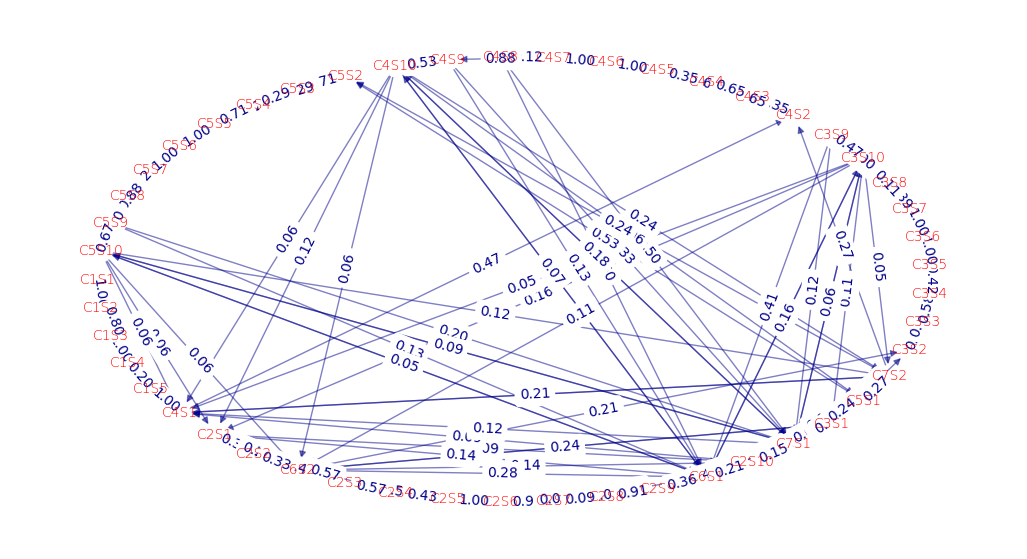

In [19]:
fig = plot_state_transition_graph(
    state_transition_probability_df,
    figsize=(13,7),
    edge_color='darkblue',
    edge_font_color='darkblue',
    node_font_color='red',
    fontsize=10
)
plt.show()

Alternatively, using `arcontrol2smcat` and `state-machine-cat` (see `example_workflow/README.md`), a simple (for demonstration purpose only, non-exhaustive) visualization can be obtained.

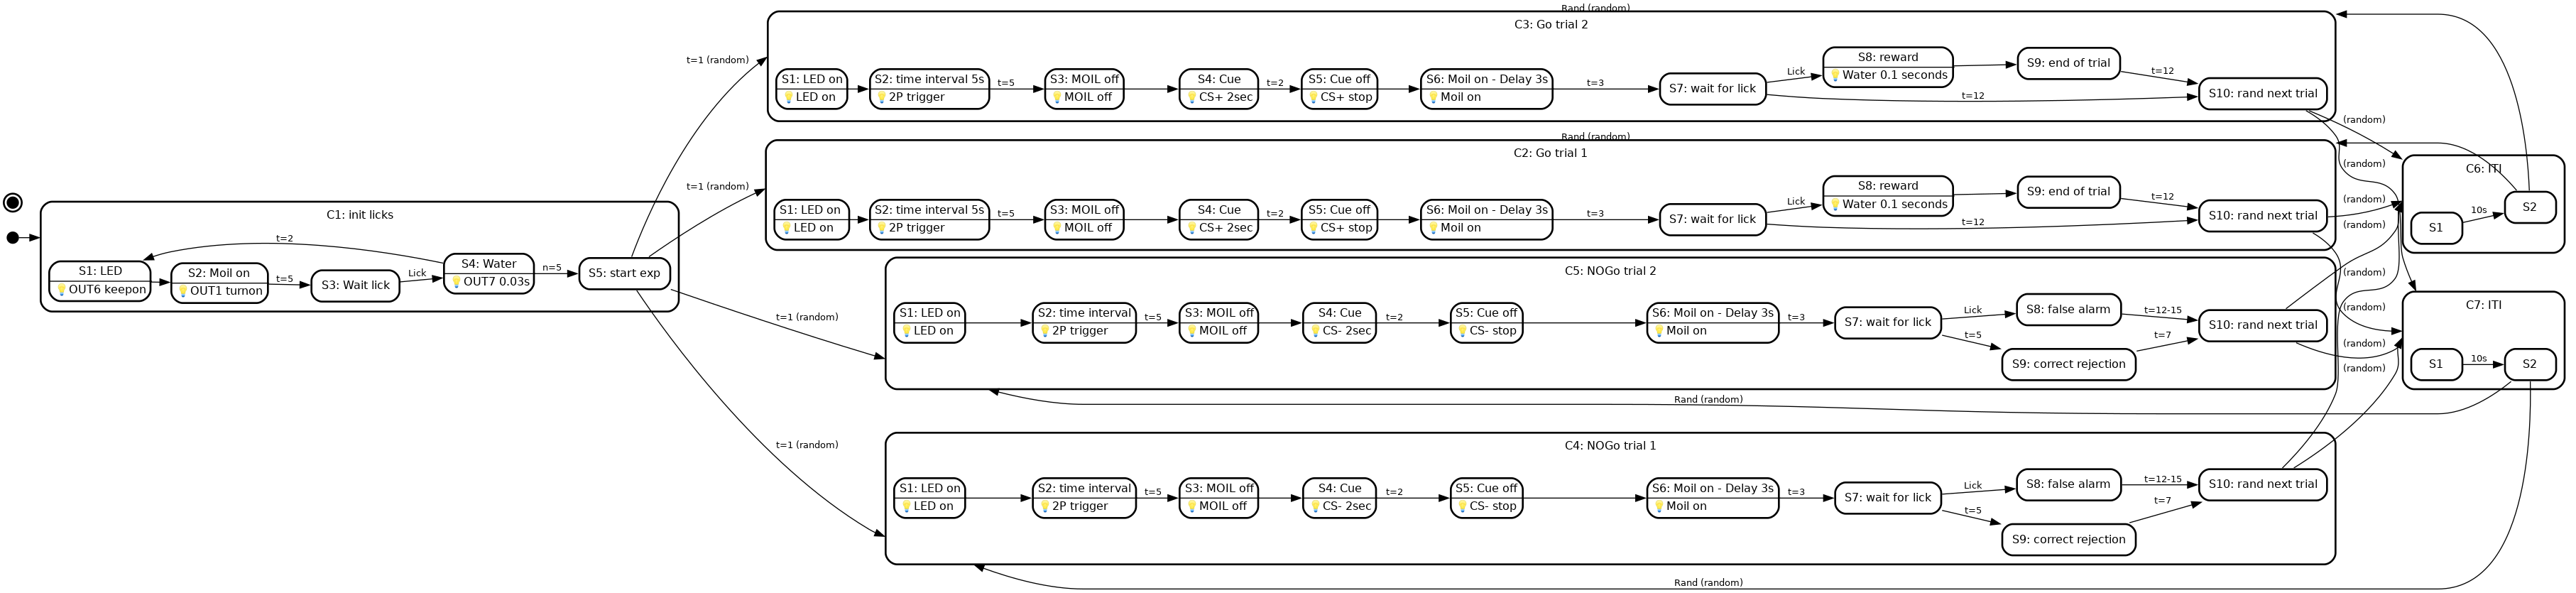

In [20]:
from IPython.display import Image
Image(filename='data/task/GNG_2021.png') 

# Load and plot the TrialsTable from the NWB file

In [21]:
# Get the TrialsTable from file
trials = nwb.trials
display(trials.to_dataframe(index=True))

,start_time,stop_time,states,events,actions
id,,,,,
0,0.000,40.096,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
1,40.096,62.197,"[22, 23, 24, 25, 26, 27, 28]","[131, 132, 133, 134, 135, 136, 137, 138, 139, ...","[11, 12, 13, 14]"
2,62.197,72.197,"[29, 30, 31, 32]","[149, 150, 151, 152, 153, 154, 155]",[]
3,72.197,97.296,"[33, 34, 35, 36, 37, 38, 39, 40, 41]","[156, 157, 158, 159, 160, 161, 162]","[15, 16, 17, 18]"
4,97.296,107.296,"[42, 43]",[],[]
...,...,...,...,...,...
148,2432.217,2442.217,"[868, 869]",[],[]
149,2442.217,2464.496,"[870, 871, 872, 873, 874, 875, 876, 877, 878, ...","[1609, 1610, 1611, 1612, 1613, 1614, 1615, 161...","[344, 345, 346, 347, 348]"
150,2464.496,2474.496,"[880, 881]",[],[]


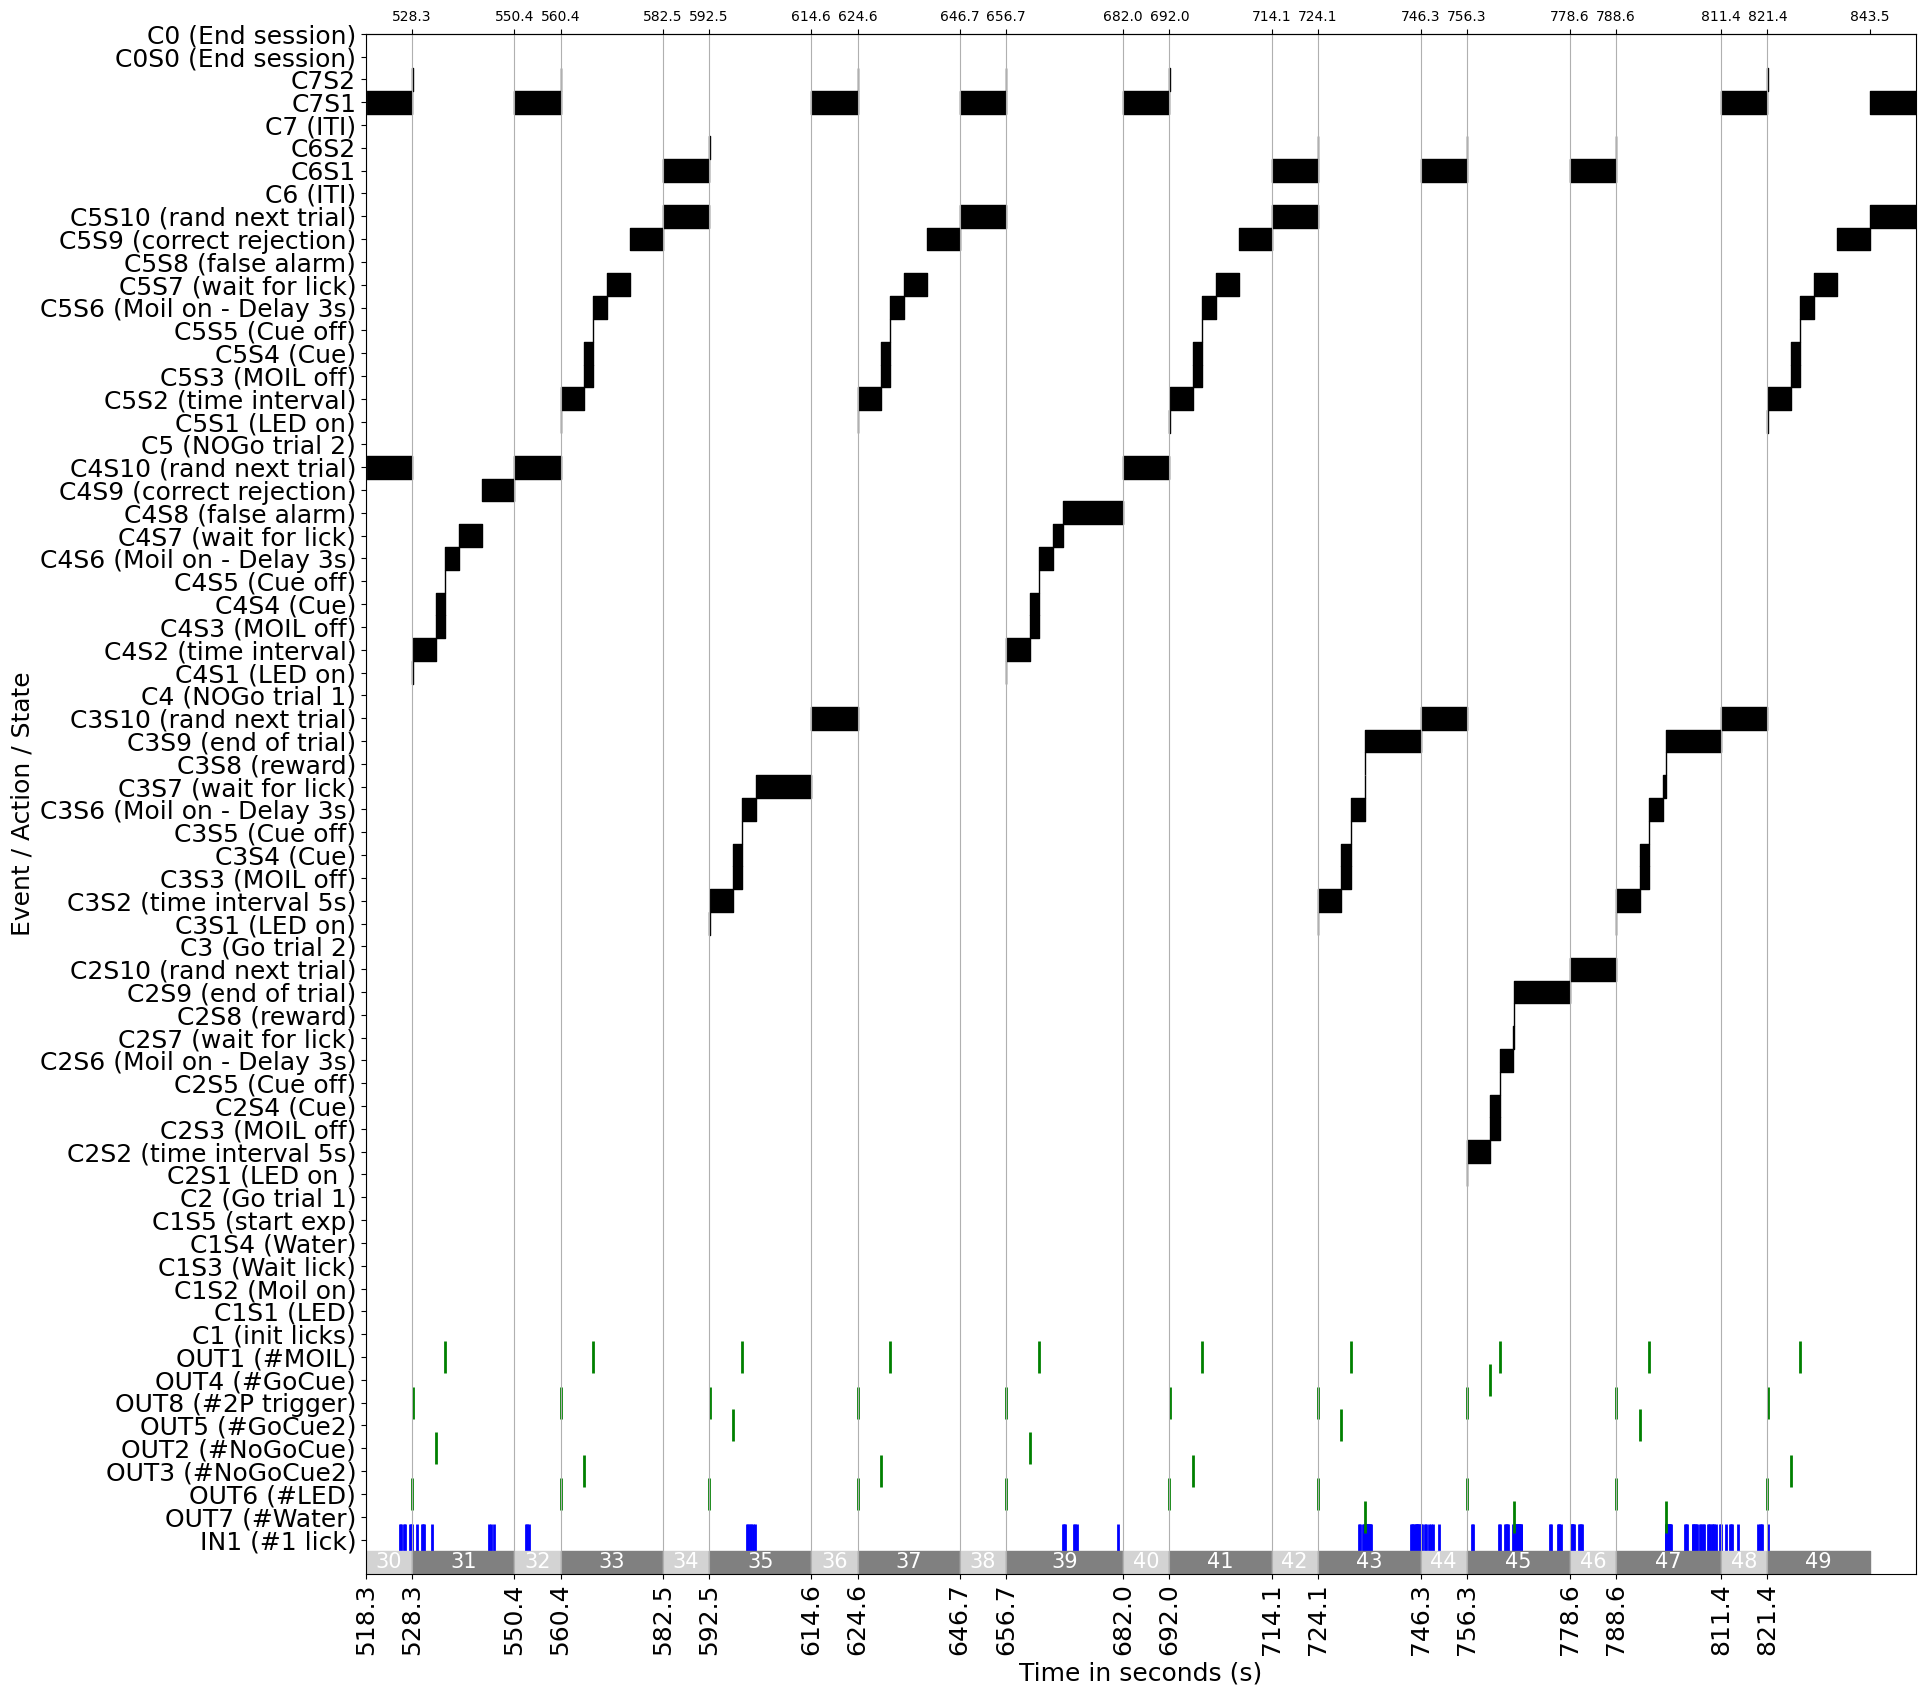

In [22]:
plot_trials(
    trials=trials[30:50],
    states=nwb.acquisition['states'], 
    state_types=nwb.get_lab_meta_data('task').state_types,
    actions=nwb.acquisition['actions'], 
    action_types=nwb.get_lab_meta_data('task').action_types,
    events=nwb.acquisition['events'], 
    event_types=nwb.get_lab_meta_data('task').event_types,
    state_description_field = 'state_label',
    action_value_field = 'action_label',
    event_value_field = 'event_label',
    figsize=(20, 20),
    fontsize=18,
    rectangle_height=1,
    marker_size=500)
plt.xticks(rotation = 90)
plt.show()